In [1]:
# Load dependencies
import os, shutil
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.image as mpimg
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight
import matplotlib.image as mpimg
from capstone_funcs import visualize_images, preprocessing_dense_data, visualize_nn, visualize_nn_test, nn_model, cnn_preprocessing, visualize_cnn, visualize_cnn_test, cnn_model


%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Filepaths
train_dir = 'dermoscopic_images/train'
test_dir = 'dermoscopic_images/test/' 

# Check functionality and num images
train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')
train_unknown_dir = os.path.join(train_dir, 'unknown')
train_benign_dir

test_benign_dir = os.path.join(test_dir, 'benign')
test_malignant_dir = os.path.join(test_dir, 'malignant')
test_unknown_dir = os.path.join(test_dir, 'unknown')

In [3]:
# Delete metadata files created by Mac OS
!find . -name ".DS_Store" -delete

In [5]:
# Check number of files
print('There are', len(os.listdir(train_benign_dir)), 'benign images in the training set')
print('There are', len(os.listdir(train_malignant_dir)), 'malignant images in the training set')
print('There are', len(os.listdir(train_unknown_dir)), 'unknown images in the training set')
print('')
print('There are', len(os.listdir(test_benign_dir)), 'benign images in the testing set')
print('There are', len(os.listdir(test_malignant_dir)), 'malignant images in the testing set')
print('There are', len(os.listdir(test_unknown_dir)), 'unknown images in the testing set')

There are 2400 benign images in the training set
There are 1500 malignant images in the training set
There are 1500 unknown images in the training set

There are 600 benign images in the testing set
There are 600 malignant images in the testing set
There are 579 unknown images in the testing set


<ipython-input-5-a3b6e40039f6>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(p*100))+'%' for p in ax.get_yticks()])


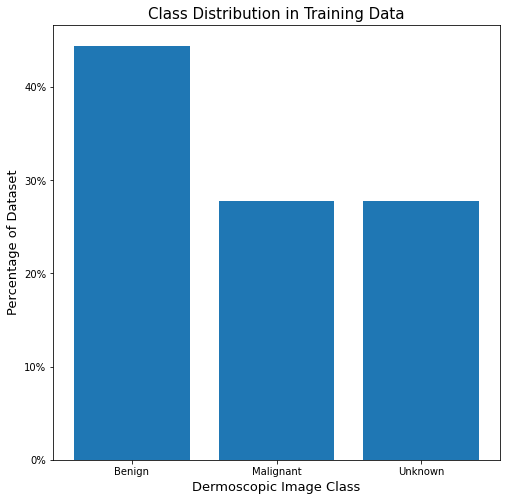

In [5]:
# Visualize class distribution in training data
total_images = len(os.listdir(train_benign_dir)) + len(os.listdir(train_malignant_dir)) + len(os.listdir(train_unknown_dir))
fig, ax = plt.subplots(figsize=(8, 8))

ax.bar(x=['Benign', 'Malignant', 'Unknown'], height=[len(os.listdir(train_benign_dir))/total_images, 
                                          len(os.listdir(train_malignant_dir))/total_images,
                                          len(os.listdir(train_unknown_dir))/total_images])
ax.set_title('Class Distribution in Training Data', size=15)
ax.set_ylabel('Percentage of Dataset', size=13)
ax.set_xlabel('Dermoscopic Image Class', size=13)
ax.set_yticklabels([str(int(p*100))+'%' for p in ax.get_yticks()])
plt.show()

In [6]:
train_benign_filepaths = [os.path.join(train_benign_dir, name) for name in os.listdir(train_benign_dir)]
train_malignant_filepaths = [os.path.join(train_malignant_dir, name) for name in os.listdir(train_malignant_dir)]
train_unknown_filepaths = [os.path.join(train_unknown_dir, name) for name in os.listdir(train_unknown_dir)]

In [7]:
tr_benign_images = [mpimg.imread(img) for img in train_benign_filepaths[:10]]
tr_malignant_images = [mpimg.imread(img) for img in train_malignant_filepaths[:10]]
tr_unknown_images = [mpimg.imread(img) for img in train_unknown_filepaths[:10]]

In [8]:
images = [(tr_benign_images, 'Benign'), (tr_malignant_images, 'Malignant'), (tr_unknown_images, 'Unknown')]

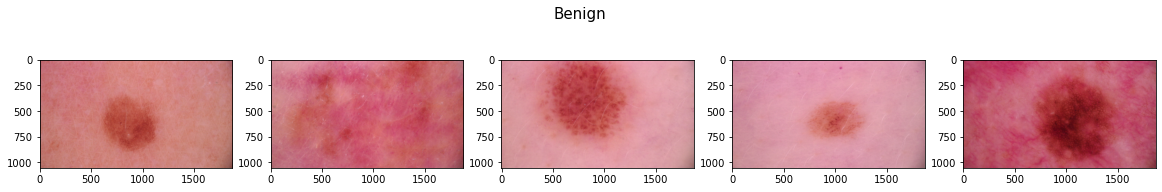

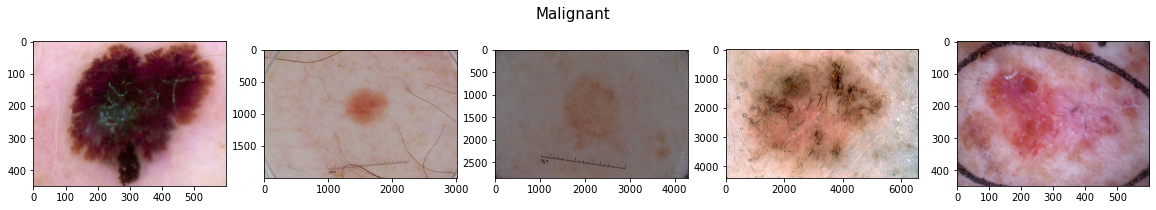

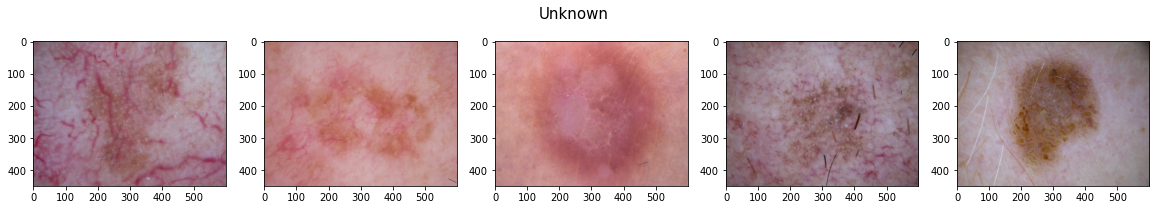

In [9]:
for im, name in images:
    visualize_images(im, name)

# First Simple Model–Single Layer Neural Network

Found 4320 images belonging to 3 classes.
Found 1080 images belonging to 3 classes.
ok
Epoch 1/3
34/34 [==============================] - 329s 10s/step - loss: 7.6417 - accuracy: 0.3824 - val_loss: 1.7911 - val_accuracy: 0.2861
Epoch 2/3
34/34 [==============================] - 339s 10s/step - loss: 1.1688 - accuracy: 0.5787 - val_loss: 1.1264 - val_accuracy: 0.6111
Epoch 3/3
34/34 [==============================] - 309s 9s/step - loss: 0.9098 - accuracy: 0.6562 - val_loss: 0.9257 - val_accuracy: 0.5611


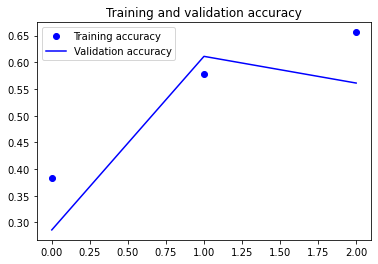

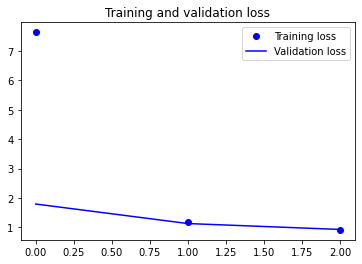

<Figure size 432x288 with 0 Axes>


Training Evaluation:
34/34 [==============================] - 174s 5s/step - loss: 0.8623 - accuracy: 0.5961

Validation Evaluation:
9/9 [==============================] - 129s 14s/step - loss: 0.9257 - accuracy: 0.5611

Test Confusion Matrix



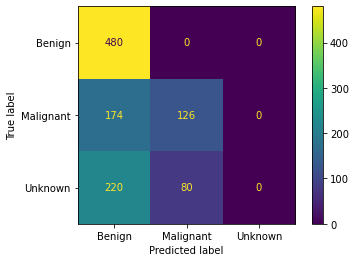

In [10]:
model = nn_model([8], input_nodes=32, batch_size=128, output_nodes=3, output_activation='softmax', train_directory=train_dir, color='rgb', optimizer='adam', loss='categorical_crossentropy', epochs=3, metrics=['accuracy'])

# Second Model–First Convolutional Neural Network

In [15]:
train_gen, val_gen = cnn_preprocessing(train_dir, ts_tuple=(128,128), color='rgb', batch_size=128, class_mode='categorical')

Found 4320 images belonging to 3 classes.
Found 1080 images belonging to 3 classes.


In [16]:
opt = Adam(learning_rate=0.0015)

In [17]:
c_model = models.Sequential()

c_model.add(Conv2D(256, kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
c_model.add(MaxPooling2D(2,2))
c_model.add(Conv2D(64, kernel_size=(5,5), activation='relu', kernel_regularizer=l2(l2=0.001)))
c_model.add(MaxPooling2D(2,2))
c_model.add(Conv2D(16, kernel_size=(3,3), kernel_regularizer=l2(l2=0.001)))
c_model.add(BatchNormalization())
c_model.add(Activation('relu'))
c_model.add(MaxPooling2D(2,2))

c_model.add(Flatten())

c_model.add(Dense(8, activation='relu', kernel_regularizer=l2(l2=0.001)))
c_model.add(Dense(4, kernel_regularizer=l2(l2=0.001)))
c_model.add(BatchNormalization())
c_model.add(Activation('relu'))
c_model.add(Dense(3, activation='softmax'))
            
            
c_model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
            

history = c_model.fit(train_gen,
                      steps_per_epoch=33,
                      epochs=20,
                      validation_data=(val_gen),
                      validation_steps=8)

Epoch 1/20
33/33 [==============================] - 866s 26s/step - loss: 0.9478 - accuracy: 0.6286 - val_loss: 1.2023 - val_accuracy: 0.5127
Epoch 2/20
33/33 [==============================] - 856s 26s/step - loss: 0.8187 - accuracy: 0.7013 - val_loss: 1.1277 - val_accuracy: 0.2412
Epoch 3/20
33/33 [==============================] - 834s 25s/step - loss: 0.7673 - accuracy: 0.7073 - val_loss: 1.1886 - val_accuracy: 0.2969
Epoch 4/20
33/33 [==============================] - 844s 26s/step - loss: 0.7266 - accuracy: 0.7340 - val_loss: 0.8265 - val_accuracy: 0.6543
Epoch 5/20
33/33 [==============================] - 852s 26s/step - loss: 0.6867 - accuracy: 0.7428 - val_loss: 0.9610 - val_accuracy: 0.6084
Epoch 6/20
33/33 [==============================] - 829s 25s/step - loss: 0.6441 - accuracy: 0.8244 - val_loss: 1.0547 - val_accuracy: 0.5156
Epoch 7/20
33/33 [==============================] - 822s 25s/step - loss: 0.5949 - accuracy: 0.8330 - val_loss: 1.0016 - val_accuracy: 0.4199
Epoch 

In [18]:
c_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 256)     7168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 59, 59, 64)        409664    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 27, 16)        9232      
_________________________________________________________________
batch_normalization_4 (Batch (None, 27, 27, 16)        64        
_________________________________________________________________
activation_4 (Activation)    (None, 27, 27, 16)       

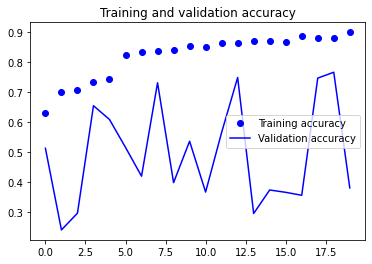

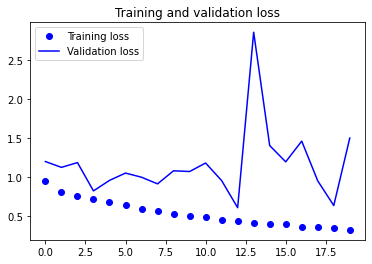

<Figure size 432x288 with 0 Axes>


Training Evaluation:
34/34 [==============================] - 240s 7s/step - loss: 1.4084 - accuracy: 0.3935

Validation Evaluation:
9/9 [==============================] - 137s 15s/step - loss: 1.4787 - accuracy: 0.3759

Test Confusion Matrix



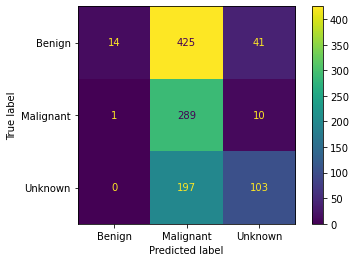

In [20]:
visualize_cnn(history, c_model, train_gen, val_gen, multi=True, labels=['Benign', 'Malignant', 'Unknown'])

# Third Model–CNN With Added Dense And Normalization Layers

In [9]:
train_gen1, val_gen1 = cnn_preprocessing(train_dir, ts_tuple=(128,128), color='rgb', batch_size=128, class_mode='categorical')

Found 4320 images belonging to 3 classes.
Found 1080 images belonging to 3 classes.


In [10]:
opt1 = Adam(learning_rate=0.0025)

In [ ]:
c_model1 = models.Sequential()

c_model1.add(Conv2D(256, kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
c_model1.add(MaxPooling2D(2,2))
c_model1.add(Conv2D(64, kernel_size=(5,5), kernel_regularizer=l2(l2=0.001)))
c_model1.add(BatchNormalization())
c_model1.add(Activation('relu'))
c_model1.add(MaxPooling2D(2,2))
c_model1.add(Conv2D(16, kernel_size=(3,3), kernel_regularizer=l2(l2=0.001)))
c_model1.add(BatchNormalization())
c_model1.add(Activation('relu'))
c_model1.add(MaxPooling2D(2,2))

c_model1.add(Flatten())

c_model1.add(Dense(8, activation='relu', kernel_regularizer=l2(l2=0.001)))
c_model1.add(Dense(4, kernel_regularizer=l2(l2=0.001)))
c_model1.add(BatchNormalization())
c_model1.add(Activation('relu'))
c_model1.add(Dense(4, kernel_regularizer=l2(l2=0.001)))
c_model1.add(BatchNormalization())
c_model1.add(Activation('relu'))
c_model1.add(Dense(3, activation='softmax'))
            
            
c_model1.compile(loss='categorical_crossentropy',
                 optimizer=opt1,
                 metrics=['accuracy', 'Recall'])
            

history1 = c_model1.fit(train_gen1,
                        steps_per_epoch=33,
                        epochs=30,
                        validation_data=(val_gen1),
                        validation_steps=8)

Epoch 1/30
33/33 [==============================] - 922s 28s/step - loss: 1.0819 - accuracy: 0.6527 - recall: 0.0799 - val_loss: 1.1128 - val_accuracy: 0.7129 - val_recall: 0.0000e+00
Epoch 2/30
33/33 [==============================] - 860s 26s/step - loss: 0.8555 - accuracy: 0.7996 - recall: 0.5153 - val_loss: 1.1044 - val_accuracy: 0.4912 - val_recall: 0.0000e+00
Epoch 3/30
33/33 [==============================] - 855s 26s/step - loss: 0.6896 - accuracy: 0.8149 - recall: 0.6846 - val_loss: 1.0636 - val_accuracy: 0.5381 - val_recall: 0.1123
Epoch 4/30
33/33 [==============================] - 838s 25s/step - loss: 0.5796 - accuracy: 0.8304 - recall: 0.7569 - val_loss: 0.9795 - val_accuracy: 0.5527 - val_recall: 0.4434
Epoch 5/30
33/33 [==============================] - 837s 25s/step - loss: 0.5374 - accuracy: 0.8306 - recall: 0.7906 - val_loss: 1.6333 - val_accuracy: 0.2920 - val_recall: 0.2861
Epoch 6/30
33/33 [==============================] - 822s 25s/step - loss: 0.4911 - accuracy:

# Fourth Model–Adding Dropout Layers

In [8]:
train_gen2, val_gen2 = cnn_preprocessing(train_dir, ts_tuple=(128,128), color='rgb', batch_size=128, class_mode='categorical')

Found 4320 images belonging to 3 classes.
Found 1080 images belonging to 3 classes.


In [6]:
opt2 = Adam(learning_rate=0.0025)

In [9]:
c_model2 = models.Sequential()

c_model2.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
c_model2.add(MaxPooling2D(2,2))
c_model2.add(Conv2D(64, kernel_size=(5,5), kernel_regularizer=l2(l2=0.001)))
c_model2.add(BatchNormalization())
c_model2.add(Activation('relu'))
c_model2.add(MaxPooling2D(2,2))
c_model2.add(Conv2D(128, kernel_size=(3,3), kernel_regularizer=l2(l2=0.001)))
c_model2.add(BatchNormalization())
c_model2.add(Activation('relu'))
c_model2.add(MaxPooling2D(2,2))

c_model2.add(Flatten())

c_model2.add(Dense(64, activation='relu', kernel_regularizer=l2(l2=0.001)))
c_model2.add(Dropout(0.25))
c_model2.add(Dense(16, kernel_regularizer=l2(l2=0.001)))
c_model2.add(BatchNormalization())
c_model2.add(Activation('relu'))
c_model2.add(Dropout(0.5))
c_model2.add(Dense(4, kernel_regularizer=l2(l2=0.001)))
c_model2.add(BatchNormalization())
c_model2.add(Activation('relu'))
c_model2.add(Dropout(0.5))
c_model2.add(Dense(3, activation='softmax'))
            
            
c_model2.compile(loss='categorical_crossentropy',
                 optimizer=opt2,
                 metrics=['accuracy', 'Recall'])
            

history2 = c_model2.fit(train_gen2,
                        steps_per_epoch=33,
                        epochs=20,
                        validation_data=(val_gen2),
                        validation_steps=8)

Epoch 1/20
33/33 [==============================] - 353s 11s/step - loss: 1.6301 - accuracy: 0.4494 - recall: 0.1579 - val_loss: 2.2852 - val_accuracy: 0.2930 - val_recall: 0.2793
Epoch 2/20
33/33 [==============================] - 345s 10s/step - loss: 1.4730 - accuracy: 0.5069 - recall: 0.2564 - val_loss: 1.3624 - val_accuracy: 0.4746 - val_recall: 9.7656e-04
Epoch 3/20
33/33 [==============================] - 346s 10s/step - loss: 1.2956 - accuracy: 0.5308 - recall: 0.3042 - val_loss: 1.2398 - val_accuracy: 0.6289 - val_recall: 0.1738
Epoch 4/20
33/33 [==============================] - 346s 10s/step - loss: 1.1397 - accuracy: 0.5699 - recall: 0.3287 - val_loss: 1.1548 - val_accuracy: 0.5342 - val_recall: 0.4668
Epoch 5/20
33/33 [==============================] - 344s 10s/step - loss: 1.0761 - accuracy: 0.5754 - recall: 0.3328 - val_loss: 1.0344 - val_accuracy: 0.6670 - val_recall: 0.3223
Epoch 6/20
33/33 [==============================] - 347s 11s/step - loss: 1.0059 - accuracy: 0.6

In [10]:
c_model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 59, 59, 64)        51264     
_________________________________________________________________
batch_normalization_12 (Batc (None, 59, 59, 64)        256       
_________________________________________________________________
activation_12 (Activation)   (None, 59, 59, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 27, 27, 128)      

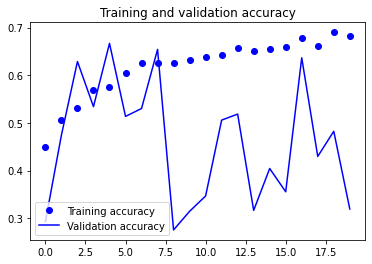

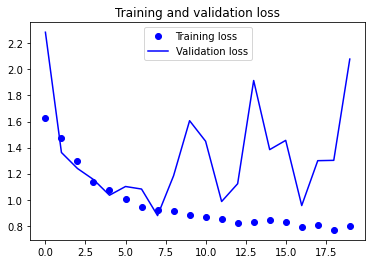

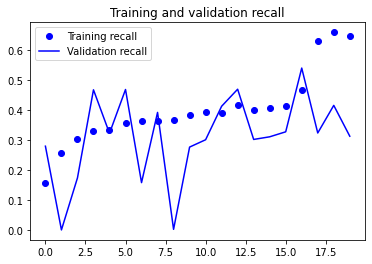


Training Evaluation:
34/34 [==============================] - 200s 6s/step - loss: 2.0396 - accuracy: 0.3037 - recall: 0.2977

Validation Evaluation:
9/9 [==============================] - 122s 14s/step - loss: 2.0276 - accuracy: 0.3037 - recall: 0.2972

Test Confusion Matrix



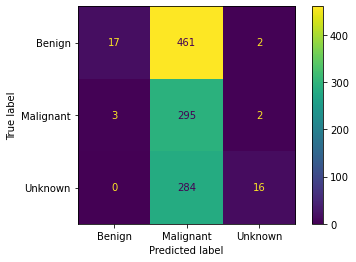

In [15]:
visualize_cnn(history2, c_model2, train_gen2, val_gen2, multi=True, labels=['Benign', 'Malignant', 'Unknown'])

In [4]:
# Callback function to save model after each epoch if the val_recall is the max of the model so far
checkpoint_filepath='/callback_checkpoints/model_five/{epoch:02d}-{val_recall:.2f}.hdf5'
my_callback=ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_recall', save_best_only=True, mode='max')

# Fifth Model–Architecture Of Third Model + One Additional Conv Layer + One Dropout Layer In Dense Layers

In [5]:
train_gen3, val_gen3 = cnn_preprocessing(train_dir, ts_tuple=(128,128), color='rgb', batch_size=128, class_mode='categorical')

Found 4320 images belonging to 3 classes.
Found 1080 images belonging to 3 classes.


In [7]:
c_model3 = models.Sequential()

c_model3.add(Conv2D(256, kernel_size=(5,5), activation='relu',input_shape=(128,128,3)))
c_model3.add(MaxPooling2D(2,2))
c_model3.add(Conv2D(64, kernel_size=(3,3), kernel_regularizer=l2(l2=0.001)))
c_model3.add(BatchNormalization())
c_model3.add(Activation('relu'))
c_model3.add(MaxPooling2D(2,2))
c_model3.add(Conv2D(16, kernel_size=(5,5), kernel_regularizer=l2(l2=0.001)))
c_model3.add(BatchNormalization())
c_model3.add(Activation('relu'))
c_model3.add(MaxPooling2D(2,2))
c_model3.add(Conv2D(16, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(l2=0.001)))
c_model3.add(MaxPooling2D(2,2))

c_model3.add(Flatten())

c_model3.add(Dense(256, activation='relu', kernel_regularizer=l2(l2=0.001)))
c_model3.add(Dropout(0.5))
c_model3.add(Dense(16, kernel_regularizer=l2(l2=0.001)))
c_model3.add(BatchNormalization())
c_model3.add(Activation('relu'))
c_model3.add(Dropout(0.5))
c_model3.add(Dense(4, kernel_regularizer=l2(l2=0.001)))
c_model3.add(BatchNormalization())
c_model3.add(Activation('relu'))
c_model3.add(Dense(3, activation='softmax'))
            
            
c_model3.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy', 'Recall'])
            

history3 = c_model3.fit(train_gen3,
                        steps_per_epoch=33,
                        epochs=25,
                        validation_data=(val_gen3),
                        validation_steps=8,
                        callbacks=my_callback)

Epoch 1/25
33/33 [==============================] - 650s 20s/step - loss: 1.4009 - accuracy: 0.5966 - recall: 0.1491 - val_loss: 1.4553 - val_accuracy: 0.5664 - val_recall: 9.7656e-04
Epoch 2/25
33/33 [==============================] - 614s 19s/step - loss: 1.2108 - accuracy: 0.7369 - recall: 0.2567 - val_loss: 1.4252 - val_accuracy: 0.4688 - val_recall: 0.0000e+00
Epoch 3/25
33/33 [==============================] - 651s 20s/step - loss: 1.0874 - accuracy: 0.7652 - recall: 0.4221 - val_loss: 1.3145 - val_accuracy: 0.4775 - val_recall: 0.4668
Epoch 4/25
33/33 [==============================] - 613s 19s/step - loss: 0.9923 - accuracy: 0.7867 - recall: 0.5697 - val_loss: 1.2008 - val_accuracy: 0.5986 - val_recall: 0.3018
Epoch 5/25
33/33 [==============================] - 608s 18s/step - loss: 0.9094 - accuracy: 0.7960 - recall: 0.6570 - val_loss: 1.3018 - val_accuracy: 0.3477 - val_recall: 0.2803
Epoch 6/25
33/33 [==============================] - 624s 19s/step - loss: 0.8391 - accuracy:

In [8]:
c_model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 256)     19456     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        147520    
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 60, 60, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        2

In [11]:
c_model3.save('/Users/ericdenbin/Documents/flatiron_ds/5_phase/capstone/repo/models/cnn3.h5')

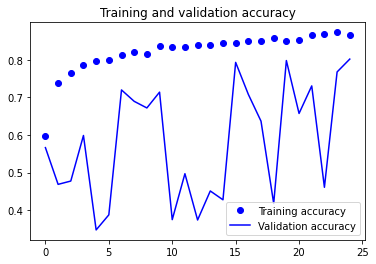

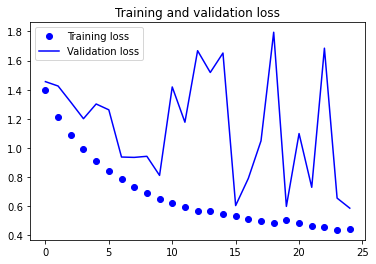

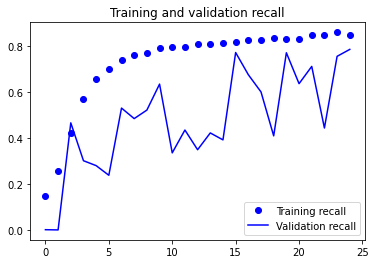


Training Evaluation:
34/34 [==============================] - 215s 6s/step - loss: 0.5494 - accuracy: 0.8271 - recall: 0.8146

Validation Evaluation:
9/9 [==============================] - 130s 14s/step - loss: 0.5879 - accuracy: 0.7991 - recall: 0.7843

Test Confusion Matrix



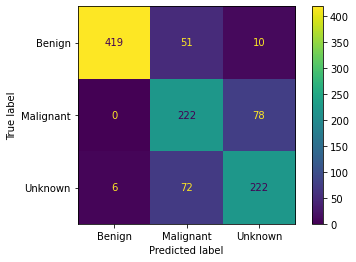

In [12]:
visualize_cnn(history3, c_model3, train_gen3, val_gen3, multi=True, labels=['Benign', 'Malignant', 'Unknown'])

In [6]:
checkpoint_filepath2='/Users/ericdenbin/Documents/flatiron_ds/5_phase/capstone/repo/callback_checkpoints/model_five/checkpoint_model.h5'
my_callback2=ModelCheckpoint(filepath=checkpoint_filepath2, monitor='val_recall', save_best_only=True, mode='max')

In [7]:
train_gen4, val_gen4 = cnn_preprocessing(train_dir, ts_tuple=(128,128), color='rgb', batch_size=128, class_mode='categorical')

Found 4320 images belonging to 3 classes.
Found 1080 images belonging to 3 classes.


In [8]:
c_model4 = models.Sequential()

c_model4.add(Conv2D(256, kernel_size=(5,5), activation='relu',input_shape=(128,128,3)))
c_model4.add(MaxPooling2D(2,2))
c_model4.add(Conv2D(64, kernel_size=(3,3), kernel_regularizer=l2(l2=0.001)))
c_model4.add(BatchNormalization())
c_model4.add(Activation('relu'))
c_model4.add(MaxPooling2D(2,2))
c_model4.add(Conv2D(16, kernel_size=(5,5), kernel_regularizer=l2(l2=0.001)))
c_model4.add(BatchNormalization())
c_model4.add(Activation('relu'))
c_model4.add(MaxPooling2D(2,2))
c_model4.add(Conv2D(16, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(l2=0.001)))
c_model4.add(MaxPooling2D(2,2))
c_model4.add(Conv2D(8, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(l2=0.001)))
c_model4.add(MaxPooling2D(2,2))

c_model4.add(Flatten())

c_model4.add(Dense(256, activation='relu', kernel_regularizer=l2(l2=0.001)))
c_model4.add(Dropout(0.5))
c_model4.add(Dense(128, activation='relu', kernel_regularizer=l2(l2=0.001)))
c_model4.add(Dropout(0.5))
c_model4.add(Dense(16, kernel_regularizer=l2(l2=0.001)))
c_model4.add(BatchNormalization())
c_model4.add(Activation('relu'))
c_model4.add(Dropout(0.5))
c_model4.add(Dense(4, kernel_regularizer=l2(l2=0.001)))
c_model4.add(BatchNormalization())
c_model4.add(Activation('relu'))
c_model4.add(Dense(3, activation='softmax'))
            
            
c_model4.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy', 'Recall'])
            

history4 = c_model4.fit(train_gen4,
                        steps_per_epoch=33,
                        epochs=30,
                        validation_data=(val_gen4),
                        validation_steps=8,
                        callbacks=my_callback2)

Epoch 1/30
33/33 [==============================] - 662s 20s/step - loss: 1.2902 - accuracy: 0.5494 - recall: 0.2832 - val_loss: 1.4019 - val_accuracy: 0.2930 - val_recall: 0.0000e+00
Epoch 2/30
33/33 [==============================] - 639s 19s/step - loss: 1.1096 - accuracy: 0.6524 - recall: 0.3333 - val_loss: 1.3620 - val_accuracy: 0.2930 - val_recall: 0.0000e+00
Epoch 3/30
33/33 [==============================] - 627s 19s/step - loss: 1.0242 - accuracy: 0.6687 - recall: 0.3640 - val_loss: 1.2430 - val_accuracy: 0.5352 - val_recall: 0.0264
Epoch 4/30
33/33 [==============================] - 610s 18s/step - loss: 0.9744 - accuracy: 0.6703 - recall: 0.3783 - val_loss: 1.3166 - val_accuracy: 0.3340 - val_recall: 0.0000e+00
Epoch 5/30
33/33 [==============================] - 616s 19s/step - loss: 0.9234 - accuracy: 0.6718 - recall: 0.4022 - val_loss: 1.3278 - val_accuracy: 0.2949 - val_recall: 0.0000e+00
Epoch 6/30
33/33 [==============================] - 605s 18s/step - loss: 0.8897 - a